In [54]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

response = requests.get('https://en.wikipedia.org/wiki/Areas_of_Chennai')

soup = BeautifulSoup(response.text, 'lxml')

table = soup.find('table', {'class':'wikitable'})
table_rows = table.find_all('tr')

chennai_list = []

for tr in table_rows:
    td = tr.find_all('td')
    row = [i.text for i in td]
    chennai_list.append(row)
    
chennai_df = pd.DataFrame(chennai_list, columns=['Location'])

chennai_df['Location'] = df['Location'].str.strip()

chennai_df.dropna(axis=0, inplace=True)

chennai_df.shape

(156, 1)

In [37]:
# importing the requests library 
import requests 
import json
import pandas as pd

#for index, row in df.iterrows():
#    try:
        # api-endpoint 
#        URL = "https://api.opencagedata.com/geocode/v1/json"

        # defining a params dict for the parameters to be sent to the API 
#        PARAMS = {'pretty':'1', 'q': row.Location + ',Chennai', 'key':'5238a8d178f0435cb5e6d6519281a1e0', 'language':'en'} 

        # sending get request and saving the response as response object 
#        r = requests.get(url = URL, params = PARAMS) 

        # extracting data in json format 
#        data = r.json()  

#        print(row.Location, data['results'][0]['geometry'])
#    except ValueError:
#        print('Error in:' + row.Location)

In [55]:
chennai_coordinates = pd.read_csv('https://raw.githubusercontent.com/srinivasanbragadeesan/github-example/master/chennai-lan.csv', header=None, names=['Location', 'Latitude', 'Longitude'])

print (chennai_coordinates.shape)

chennai_coordinates.head()

(151, 3)


,Location,Latitude,Longitude
0,Adambakkam,12.982221,80.209121
1,Adyar,13.006450,80.257779
2,Alandur,12.994373,80.194284
3,Alapakkam,13.049901,80.165435
4,Alwarpet,13.033860,80.254549


In [48]:
#!conda install -c conda-forge geopy --yes 
#!conda install -c conda-forge folium=0.5.0 --yes 
from geopy.geocoders import Nominatim 

address = 'Chennai'

geolocator = Nominatim(user_agent="chennai_explorer")

location = geolocator.geocode(address)

print(location.latitude, location.longitude)

13.0801721 80.2838331


In [52]:
import folium # map rendering library

map_chennai = folium.Map(location=[location.latitude, location.longitude], zoom_start=11)

for index, row in chennai_coordinates.iterrows():
    label = '{}'.format(row.Location)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [row.Latitude, row.Longitude],
        radius=5,
        label=label,
        color='green',
        fill=True,        
        fill_opacity=0.7,
        parse_html=False).add_to(map_chennai) 

map_chennai

In [56]:
CLIENT_ID = '0SFWND5UEBSAUFKQHV15VINMGVUT5CGTP42VZIJC52GCOKQG'
CLIENT_SECRET = 'BV22D1J3PF05NUM0DWJIZCBKP1PYEFGWG0513R1DKR5J2ONX'
VERSION = '20190625'
LIMIT = 100

In [57]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [59]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Location', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [78]:
#chennai_venues = getNearbyVenues(names=chennai_coordinates['Location'], latitudes=chennai_coordinates['Latitude'], longitudes=chennai_coordinates['Longitude'])
chennai_venue_categories = pd.get_dummies(chennai_venues[['Venue Category']], prefix="", prefix_sep="")

chennai_venue_categories['Location'] = chennai_venues['Location']

chennai_grouped = chennai_venue_categories.groupby('Location').mean().reset_index()

chennai_grouped.head()

,Location,ATM,Afghan Restaurant,Airport Food Court,Airport Gate,Airport Lounge,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,...,Thai Restaurant,Theater,Toy / Game Store,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Video Store,Whisky Bar,Women's Store
0,Adambakkam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,Adyar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.034483,0.0,0.0,0.0
2,Alandur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,Alapakkam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,Alwarpet,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.041667,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [79]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [83]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Location']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Location'] = chennai_grouped['Location']

for ind in np.arange(chennai_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(chennai_grouped.iloc[ind, :], num_top_venues)
    
venues_sorted

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adambakkam,Indian Restaurant,Dessert Shop,IT Services,Sporting Goods Shop,Flea Market,Frozen Yogurt Shop,Food Truck,Food Court,Food & Drink Shop,Food
1,Adyar,Indian Restaurant,North Indian Restaurant,Electronics Store,Italian Restaurant,Bookstore,Juice Bar,Lounge,Grocery Store,Furniture / Home Store,Movie Theater
2,Alandur,Café,Restaurant,Arts & Crafts Store,Women's Store,Flower Shop,Furniture / Home Store,Frozen Yogurt Shop,Food Truck,Food Court,Food & Drink Shop
3,Alapakkam,Indian Restaurant,Fast Food Restaurant,Snack Place,Diner,Donut Shop,Duty-free Shop,Electronics Store,Event Space,Farmers Market,Gaming Cafe
4,Alwarpet,Japanese Restaurant,Bakery,Restaurant,Café,Italian Restaurant,Gym,Pizza Place,Coffee Shop,Food & Drink Shop,Chinese Restaurant
5,Alwarthirunagar,Department Store,Fast Food Restaurant,Café,Gym,Clothing Store,Tea Room,Pizza Place,Electronics Store,Event Space,Farmers Market
6,Ambattur,Ice Cream Shop,Asian Restaurant,Pizza Place,Movie Theater,Flea Market,Frozen Yogurt Shop,Food Truck,Food Court,Food & Drink Shop,Food
7,Aminjikarai,Fast Food Restaurant,Clothing Store,Furniture / Home Store,Sporting Goods Shop,Electronics Store,Event Space,Multiplex,Café,Scenic Lookout,Food
8,Anna Nagar,Indian Restaurant,Café,Fast Food Restaurant,Chinese Restaurant,Electronics Store,Clothing Store,Park,Bookstore,Bistro,Restaurant
9,Arumbakkam,Department Store,Indian Restaurant,Multiplex,Hotel,Flea Market,Frozen Yogurt Shop,Food Truck,Food Court,Food & Drink Shop,Food


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


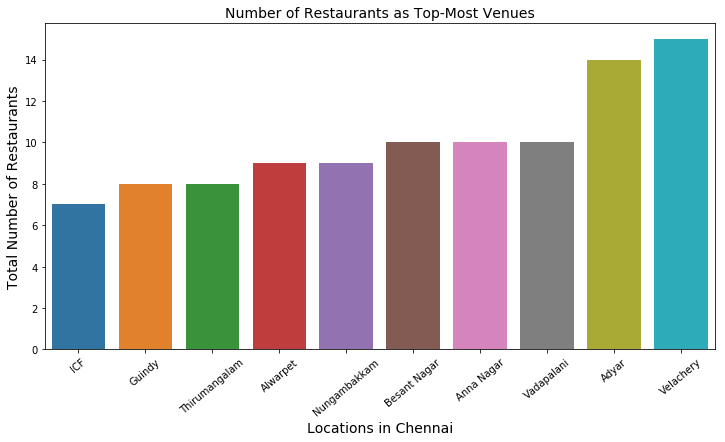

In [132]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns

chn_restaurant_by_location = chennai_venues.groupby(['Location'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())

chn_restaurant_by_location_df = chn_restaurant_by_location.to_frame().reset_index()

chn_restaurant_by_location_df.columns = ['Location', 'Number of Restaurant']

chn_restaurant_by_location_df.sort_values('Number of Restaurant', inplace=True)

chn_restaurant_by_location_df.index = np.arange(1, len(chn_restaurant_by_location_df) + 1)

chn_restaurant_by_location_df = chn_restaurant_by_location_df.tail(10)

fig = plt.figure(figsize=(12,6))

bar = sns.barplot(x='Location', y='Number of Restaurant', data=chn_restaurant_by_location_df)

bar.set_ylabel("Total Number of Restaurants", fontsize=14)
bar.set_xlabel("Locations in Chennai", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(), rotation=40)
bar.set_title("Number of Restaurants as Top-Most Venues", fontsize=14)

plt.show()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


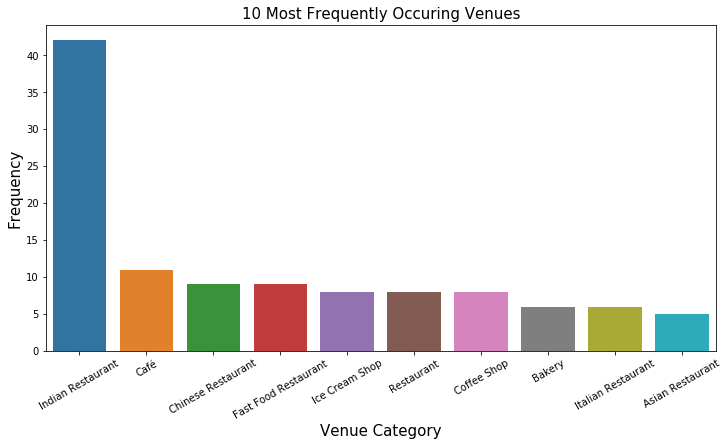

In [146]:
import seaborn as sns

chn_top_10_location = chennai_venues[chennai_venues['Location'].isin(chn_restaurant_by_location_df['Location'].values)]

chn_top_10_venues = chn_top_10_location['Venue Category'].value_counts()[0:10].to_frame(name='frequency').reset_index()

chn_top_10_venues.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)

fig = plt.figure(figsize=(12,6))

s=sns.barplot(x="Venue_Category", y="Frequency", data=chn_top_10_venues)

s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=200)
plt.show()

In [185]:
from sklearn.cluster import KMeans

chn_location_to_compare = chennai_grouped[chennai_grouped['Location'].isin(chn_top_10_location['Location'].values)]

chn_clustered = chn_location_to_compare.drop('Location', 1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(chn_clustered)

print ("Check the 4 Cluster labels :",  kmeans.labels_[0:10])

Check the 4 Cluster labels : [2 0 3 3 0 4 2 1 3 2]


In [186]:
final_df = venues_sorted[venues_sorted['Location'].isin(chn_top_10_location['Location'].values)]

final_df.insert(0, 'Cluster Label', kmeans.labels_)

final_df


,Cluster Label,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,2,Adyar,Indian Restaurant,North Indian Restaurant,Electronics Store,Italian Restaurant,Bookstore,Juice Bar,Lounge,Grocery Store,Furniture / Home Store,Movie Theater
4,0,Alwarpet,Japanese Restaurant,Bakery,Restaurant,Café,Italian Restaurant,Gym,Pizza Place,Coffee Shop,Food & Drink Shop,Chinese Restaurant
8,3,Anna Nagar,Indian Restaurant,Café,Fast Food Restaurant,Chinese Restaurant,Electronics Store,Clothing Store,Park,Bookstore,Bistro,Restaurant
14,3,Besant Nagar,Ice Cream Shop,Indian Restaurant,Coffee Shop,Sandwich Place,Café,Bistro,Food Truck,Fast Food Restaurant,New American Restaurant,South Indian Restaurant
27,0,Guindy,Hotel,Indian Restaurant,Restaurant,Bakery,Whisky Bar,Lounge,Gym Pool,Gym,Dessert Shop,Concert Hall
28,4,ICF,Fast Food Restaurant,Indian Restaurant,Malay Restaurant,Coffee Shop,Chinese Restaurant,Sporting Goods Shop,Gym / Fitness Center,BBQ Joint,Department Store,Historic Site
78,2,Nungambakkam,Indian Restaurant,South Indian Restaurant,Juice Bar,Gourmet Shop,Café,Chinese Restaurant,Multicuisine Indian Restaurant,Asian Restaurant,Bakery,Food Court
121,1,Thirumangalam,Indian Restaurant,Department Store,Pizza Place,Vegetarian / Vegan Restaurant,Café,Indian Sweet Shop,Print Shop,Fast Food Restaurant,New American Restaurant,Mobile Phone Shop
132,3,Vadapalani,Indian Restaurant,Clothing Store,Multiplex,Shopping Mall,Italian Restaurant,Bar,Hotel,Market,Fast Food Restaurant,Electronics Store
136,2,Velachery,Indian Restaurant,Chinese Restaurant,Ice Cream Shop,Restaurant,Market,Gym,Gift Shop,Movie Theater,Fast Food Restaurant,Department Store
